#  Normality Test <hr style="border:2.5px solid #126782"></hr>

Data Analyst: Gyro A. Madrona<br>
Department: Electrical Engineering

In [50]:
# imports and packages
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Shapiro-Wilk Test

In [51]:
# load dataset
df = pd.read_csv(r"raw\defects-30-sample.csv",delimiter=",")
df

,Sample,Defects
0,1,13
1,2,12
2,3,10
3,4,11
4,5,10
5,6,6
6,7,12
7,8,12
8,9,9
9,10,15


In [52]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Sample   30 non-null     int64
 1   Defects  30 non-null     int64
dtypes: int64(2)
memory usage: 612.0 bytes


In [53]:
# summary of statistics
df.describe()

,Sample,Defects
count,30.000000,30.000000
mean,15.500000,11.033333
std,8.803408,2.566137
min,1.000000,5.000000
25%,8.250000,9.250000
50%,15.500000,11.500000
75%,22.750000,13.000000
max,30.000000,15.000000


## Data Cleaning

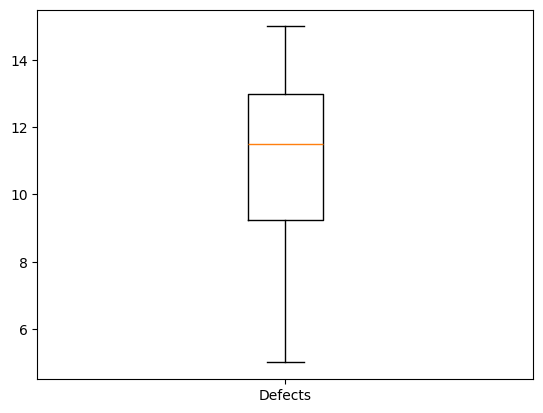

In [54]:
# check for outliers
plt.boxplot(df['Defects'],tick_labels=['Defects'])
plt.show()

In [55]:
# shapiro-wilk test
w_stat, p_value = stats.shapiro(df['Defects'])

In [56]:
# test statistc
w_stat

np.float64(0.9580360831170861)

In [57]:
# probability value
p_value

np.float64(0.27572271570425316)

In [58]:
# verdict
alpha = 0.05

if p_value < alpha:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")

Normal data


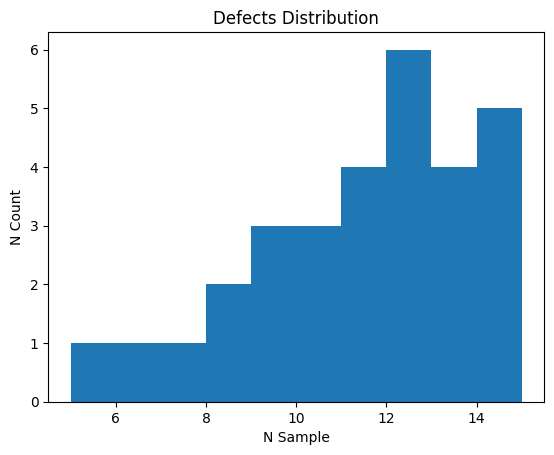

In [59]:
# defects distribution
plt.hist(df['Defects'])
plt.title('Defects Distribution')
plt.ylabel('N Count')
plt.xlabel('N Sample')
plt.show()

# Aderson-Darling Test

In [60]:
# load dataset
df = pd.read_csv(r"raw\defects-count.csv",delimiter=",")
df

,Product,Defects
0,1,12
1,2,8
2,3,9
3,4,11
4,5,9
...,...,...
315,316,15
316,317,10
317,318,8
318,319,9


In [67]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Product  320 non-null    int64
 1   Defects  320 non-null    int64
dtypes: int64(2)
memory usage: 5.1 KB


In [62]:
# summary of statistics
df.describe()

,Product,Defects
count,320.000000,320.000000
mean,160.500000,10.325000
std,92.520268,3.172274
min,1.000000,1.000000
25%,80.750000,8.000000
50%,160.500000,11.000000
75%,240.250000,12.000000
max,320.000000,18.000000


## Data Cleaning

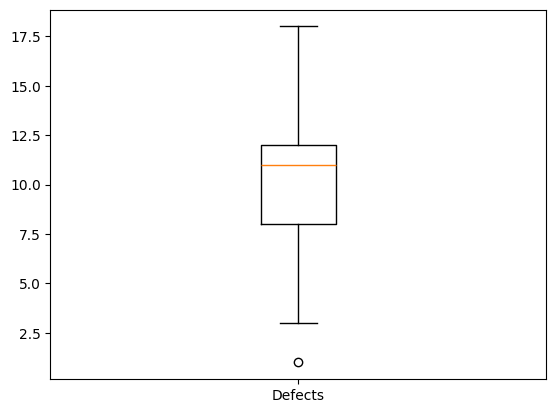

In [65]:
# check for outliers
plt.boxplot(df['Defects'],tick_labels=['Defects'])
plt.show()

In [66]:
# removing 3-sigma outliers
z = stats.zscore(df['Defects'])
outliers = (z<-3)|(z>3)
df = df[~outliers]

In [68]:
# anderson-darling statistics
a2_stat, critical, alpha = stats.anderson(df['Defects'])

In [69]:
# statistic
a2_stat

np.float64(1.694159163431209)

In [70]:
# critical values
critical

array([0.569, 0.648, 0.777, 0.907, 1.079])

In [71]:
# significance level
alpha

array([15. , 10. ,  5. ,  2.5,  1. ])

In [72]:
# verdict
# let alpha = 0.05
if a2_stat > critical[2]:
    # reject null hypothesis
    print("Non-normal data")
else:
    # fail to reject null hypothesis
    print("Normal data")

Non-normal data


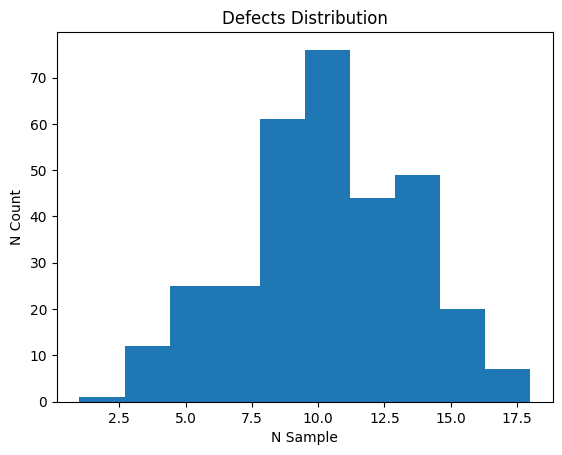

In [73]:
# defects distribution
plt.hist(df['Defects'])
plt.title('Defects Distribution')
plt.ylabel('N Count')
plt.xlabel('N Sample')
plt.show()